In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler

In [2]:
# Visualizacion del DF entero

pd.set_option('display.max_columns', None)

# Importar Datos

In [4]:
datas=pd.read_csv("datas.csv")
datas

,id_jugador,nombre_jugador,version_x,posiciones,est_general_x,valor_de_mercado,salario_semanal,edad,nacimiento,altura,id_equipo,nombre_club_x,id_liga_x,nombre_liga_x,posicion_club,id_nacionalidad_x,nacionalidad,pierna,ritmo,chut,pase,regate,defensa_x,fisico,centros_ataque,finalizacion,remate_cabeza,pase_corto_ataque,volea,habilidad_regate,efecto,eficacia_faltas,habilidad_pase_largo,habilidad_control,aceleracion,velocidad_max,agilidad,reaccion,equilibrio,potencia_tiro,potencia_salto,aguante,fortaleza,fuerza_chuts_lejanos,agresividad,anticipacion,posicionamiento,vision_juego,penalties,marcaje,abordaje,entrada,estirada,manejo,pateo,posicion_por,reflejos,velocidad_por,del_izq,del,del_dch,extr_izq,seg_del_izq,media_punta,seg_del_dch,extr_dch,med_cen_def_izq,med_cen_of,med_cen_of_izq,med_izq,med_cen_izq,med_cen,med_cen_dch,med_dch,carr_izq,med_def_izq,med_cen_def,med_cen_def_dch,carr_dch,lat_izq,def_cen_izq,def_cen,def_cen_dch,lat_dch,portero,nombre_club_y,version_y,id_liga_y,nombre_liga_y,id_nacionalidad_y,nacion_liga,est_general_y,ataque,mediocampo,defensa_y,promedio_edad_titulares,promedio_edad_equipo
0,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,1982-01-05,181,55.0,Udinese,31,Serie A,LM,27,Italia,Izq,71,59,66,66,71,73,76,49,59,68,57,63,67,59,68,69,68,73,67,72,67,73,67,77,69,67,77,72,63,51,49,70,73,73,13,4,14,9,11,10,63,63,63,67,64,64,64,67,64,64,64,68,67,67,67,68,71,69,69,69,71,72,70,70,70,72,13,udinese calcio,2015.0,31.0,serie a,27.0,italia,74.0,75.0,72.0,74.0,26.18,24.97
1,11,Romain Rocchi,2015,"MEC, MCD",68,675000,8000,32,1981-10-02,183,68.0,Metz,16,Ligue 1,RDM,18,Francia,Dch,52,62,69,68,56,69,64,54,60,73,61,65,69,49,69,73,53,52,74,68,63,72,70,54,79,71,63,63,64,72,65,46,59,57,6,7,10,7,12,8,63,63,63,66,66,66,66,66,69,69,69,66,68,68,68,66,62,65,65,65,62,60,62,62,62,60,12,fc metz,2015.0,16.0,ligue 1,18.0,francia,69.0,70.0,70.0,68.0,27.91,24.47
2,27,Joe Cole,2015,"MED, MCO",74,2400000,35000,32,1981-11-08,176,2.0,Aston Villa,13,Premier League,SUB,14,Inglaterra,Dch,60,70,78,80,36,55,81,69,52,79,75,80,83,76,68,82,62,59,77,72,82,72,58,33,60,71,68,38,72,81,65,34,33,29,8,5,12,15,6,9,70,70,70,76,72,72,72,76,76,76,76,74,68,68,68,74,56,59,59,59,56,50,48,48,48,50,12,aston villa,2015.0,13.0,premier league,14.0,inglaterra,74.0,76.0,74.0,73.0,26.00,24.64
3,28,Manuel Herrera Yague,2015,POR,76,4300000,45000,32,1981-09-29,180,468.0,Elche,53,La Liga 2,SUB,45,Espana,Izq,36,38,40,45,48,48,25,25,25,21,25,25,25,25,22,34,41,49,55,66,60,30,78,32,60,25,36,25,25,25,25,25,25,25,75,74,68,77,80,45,33,33,33,32,32,32,32,32,31,31,31,31,29,29,29,31,31,32,32,32,31,31,34,34,34,31,76,elche cf,2015.0,53.0,la liga 2,45.0,espana,72.0,72.0,71.0,72.0,25.91,24.62
4,41,Andres Iniesta Lujan,2015,"MEC, EXI",89,36000000,250000,30,1984-05-11,170,241.0,FC Barcelona,53,La Liga,LCM,45,Espana,Dch,75,72,89,91,59,63,85,73,54,93,74,92,80,70,89,94,76,75,83,90,86,65,54,78,59,75,58,68,87,93,71,57,57,56,6,13,6,13,7,9,77,77,77,87,82,82,82,87,88,88,88,88,86,86,86,88,76,77,77,77,76,70,63,63,63,70,14,fc barcelona,2015.0,53.0,la liga,45.0,espana,84.0,87.0,84.0,81.0,27.27,25.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,278132,Rakan Al Kaabi,2024,"MCD, MEC",54,250000,2000,20,2002-12-02,174,113057.0,Al Fayha,350,Pro League,RES,183,Arabia Saudita,Dch,66,34,44,49,54,63,37,30,48,50,33,47,32,37,49,45,62,69,59,46,75,49,56,74,60,28,57,52,33,43,35,55,57,56,13,12,6,8,5,8,44,44,44,45,44,44,44,45,45,45,45,47,47,47,47,47,53,53,53,53,53,54,54,54,54,54,13,al fayha,2018.0,350.0,pro league,183.0,arabia saudita,66.0,66.0,67.0,61.0,26.36,26.82
180017,278138,Josh Keyes,2024,MEC,51,130000,500,17,2006-04-26,178,1934.0,Swindon Town,61,League Two,RES,14,Inglater

In [5]:
# Revisamos las columnas de nuestro DF
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 97 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id_jugador               180021 non-null  int64  
 1   nombre_jugador           180021 non-null  object 
 2   version_x                180021 non-null  int64  
 3   posiciones               180021 non-null  object 
 4   est_general_x            180021 non-null  int64  
 5   valor_de_mercado         180021 non-null  int64  
 6   salario_semanal          180021 non-null  int64  
 7   edad                     180021 non-null  int64  
 8   nacimiento               180021 non-null  object 
 9   altura                   180021 non-null  int64  
 10  id_equipo                180021 non-null  float64
 11  nombre_club_x            180021 non-null  object 
 12  id_liga_x                180021 non-null  int64  
 13  nombre_liga_x            180021 non-null  object 
 14  posi

# Estandarizar los datos

In [7]:
# Lista de columnas a excluir
columnas_excluir = ['id_jugador', 'nombre_jugador', 'version_x', 'posiciones', 'salario_semanal', 
                    'nacimiento', 'altura', 'id_equipo', 'nombre_club_x', 'id_liga_x', 'nombre_liga_x', 
                    'posicion_club', 'id_nacionalidad_x', 'nacionalidad', 'pierna', 'centros_ataque', 
                    'remate_cabeza', 'pase_corto_ataque', 'volea', 'habilidad_regate', 'efecto', 
                    'habilidad_control', 'velocidad_max', 'agilidad', 'reaccion', 'potencia_salto', 
                    'fortaleza', 'fuerza_chuts_lejanos', 'agresividad', 'penalties', 'abordaje', 'manejo', 
                    'pateo', 'reflejos', 'velocidad_por', 'del_izq', 'del', 'del_dch', 'extr_izq', 'seg_del_izq', 
                    'media_punta', 'seg_del_dch', 'extr_dch', 'med_cen_def_izq', 'med_cen_of', 'med_cen_of_izq', 
                    'med_izq', 'med_cen_izq', 'med_cen', 'med_cen_dch', 'med_dch', 'carr_izq', 'med_def_izq', 
                    'med_cen_def', 'med_cen_def_dch', 'carr_dch', 'lat_izq', 'def_cen_izq', 'def_cen', 
                    'def_cen_dch', 'lat_dch', 'portero', 'nombre_club_y', 'version_y', 'id_liga_y', 
                    'nombre_liga_y', 'id_nacionalidad_y', 'nacion_liga', 'est_general_y', 'ataque', 
                    'mediocampo', 'defensa_y', 'promedio_edad_titulares', 'promedio_edad_equipo']


# Paso 1: Filtrar las columnas restantes
columnas_a_estandarizar = [col for col in datas.columns if col not in columnas_excluir]

# Paso 2: Estandarizar las columnas seleccionadas
scaler = StandardScaler()
datas[columnas_a_estandarizar] = scaler.fit_transform(datas[columnas_a_estandarizar])

# Ahora, las columnas seleccionadas están estandarizadas, con media 0 y desviación estándar 1.
datas[columnas_a_estandarizar]

,est_general_x,valor_de_mercado,edad,ritmo,chut,pase,regate,defensa_x,fisico,finalizacion,eficacia_faltas,habilidad_pase_largo,aceleracion,equilibrio,potencia_tiro,aguante,anticipacion,posicionamiento,vision_juego,marcaje,entrada,estirada,posicion_por
0,0.325914,-0.272351,1.466288,0.450367,0.614608,0.955012,0.528640,1.303395,0.865751,0.171784,0.928806,1.007818,0.223463,0.216473,1.058657,0.877532,1.243359,0.673524,-0.154120,1.180717,1.303144,-0.198735,-0.427821
1,0.325914,-0.272351,1.466288,-0.673052,0.817215,1.214433,0.684911,0.397464,0.564654,0.431105,0.347284,1.073729,-0.790766,-0.067561,0.993256,-0.571225,0.802492,0.725522,1.325391,0.007263,0.537580,-0.595075,-0.545403
2,1.180848,0.008015,1.466288,-0.200033,1.357498,1.992699,1.622537,-0.810443,-0.489188,1.209068,1.917392,1.007818,-0.182229,1.281600,0.993256,-1.894003,-0.422140,1.141504,1.959467,-0.579464,-0.802157,-0.481835,-0.075073
3,1.465826,0.316823,1.466288,-1.619088,-0.803637,-1.293311,-1.112205,-0.085699,-1.016109,-1.072956,-1.048367,-2.024068,-1.602149,-0.280586,-1.753557,-1.956993,-1.058949,-1.302393,-1.985896,-1.019509,-0.993548,3.311704,3.569982
4,3.318183,5.469045,1.038880,0.686876,1.492569,2.943912,2.482027,0.578650,0.113007,1.416525,1.568479,2.391940,0.764385,1.565634,0.535454,0.940521,1.047418,1.921471,2.804902,0.545096,0.489732,-0.595075,-0.192656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,-1.668933,-0.341426,-1.098157,0.154731,-1.073779,-0.947415,-0.799663,0.276673,0.113007,-0.813635,-0.350542,-0.244483,-0.182229,0.784541,-0.510951,0.688564,0.263653,-0.886411,-0.717744,0.447308,0.489732,-0.198735,-0.486612
180017,-2.096400,-0.360930,-1.739268,0.391240,-0.330889,-0.515046,-0.408985,-0.508466,-0.639737,-0.139401,-0.350542,-0.112662,0.629155,1.068575,-0.314750,-0.004320,-0.373155,-0.158441,-0.154120,-0.237207,-0.275832,-0.142115,-0.604194
180018,-1.098977,-0.321110,-1.098157,-2.328616,-1.411456,-0.774467,-2.127966,-1.052025,-2.220500,-1.902783,-1.920650,-0.639946,-3.022070,-1.345713,-0.837953,-2.082972,-1.548802,-2.082361,-1.140461,-1.557342,-1.663417,2.462404,2.217784
180019,-1.526444,-0.337363,-1.525564,0.213858,-1.073779,-1.293311,-0.799663,0.216278,-1.091384,-0.813635,-0.641302,-1.364963,0.155848,-0.422603,-0.707152,-1.327098,0.459595,-0.158441,-0.717744,0.349520,0.441884,-0.425215,-0.604194


In [8]:
# Verificamos que las columnas estandarizados son las deseadas
datas[columnas_a_estandarizar].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   est_general_x         180021 non-null  float64
 1   valor_de_mercado      180021 non-null  float64
 2   edad                  180021 non-null  float64
 3   ritmo                 180021 non-null  float64
 4   chut                  180021 non-null  float64
 5   pase                  180021 non-null  float64
 6   regate                180021 non-null  float64
 7   defensa_x             180021 non-null  float64
 8   fisico                180021 non-null  float64
 9   finalizacion          180021 non-null  float64
 10  eficacia_faltas       180021 non-null  float64
 11  habilidad_pase_largo  180021 non-null  float64
 12  aceleracion           180021 non-null  float64
 13  equilibrio            180021 non-null  float64
 14  potencia_tiro         180021 non-null  float64
 15  

In [9]:
# Cantidad de columnas estandarizadas
len(datas[columnas_a_estandarizar].columns)

23

# K-Means

In [11]:
# Queremos determinar el número óptimo de clusters que existen en los datos
acum = []
for i in range(2,9):
    model = KMeans(
        n_clusters=i, 
        n_init = 10, 
        max_iter = 300 
    )
    model.fit(datas[columnas_a_estandarizar])
    acum.append([i,model.inertia_])

## Gráfico del codo

In [13]:
# Creamos un df para organizar los datos de manera que se puedan visualizar en un gráfico
tabla_codo = pd.DataFrame(acum,columns=["clusters", "Error"])
tabla_codo

,clusters,Error
0,2,2.705716e+06
1,3,2.078906e+06
2,4,1.663739e+06
3,5,1.504117e+06
4,6,1.394237e+06
5,7,1.305812e+06
6,8,1.229558e+06


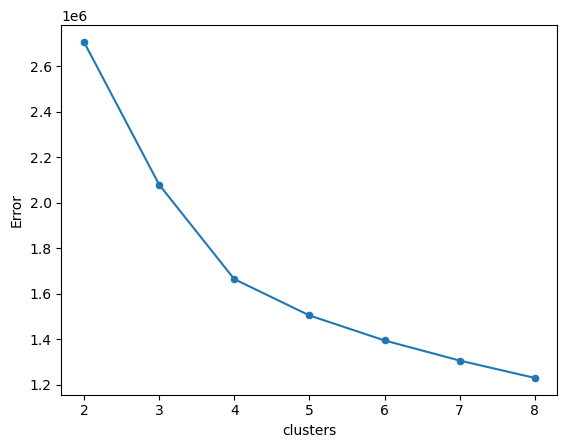

In [14]:
sns.lineplot(data = tabla_codo, x = "clusters", y = "Error")
sns.scatterplot(data = tabla_codo, x="clusters", y = "Error")
plt.show()

## Modelo

In [16]:
# Creamos un modelo que agrupa los datos en 4 grupos distintos
model = KMeans(
    n_clusters=4, 
    n_init = 10, 
    max_iter = 300 
)
model.fit(datas[columnas_a_estandarizar])

KMeans(n_clusters=4, n_init=10)

## Silhouette

In [18]:
# Evaluamos la calidad de los clusters obtenidos
silhouette_avg = silhouette_score(datas[columnas_a_estandarizar], model.labels_)
print("La puntuación promedio de silueta es:", silhouette_avg)

La puntuación promedio de silueta es: 0.28104415730816745


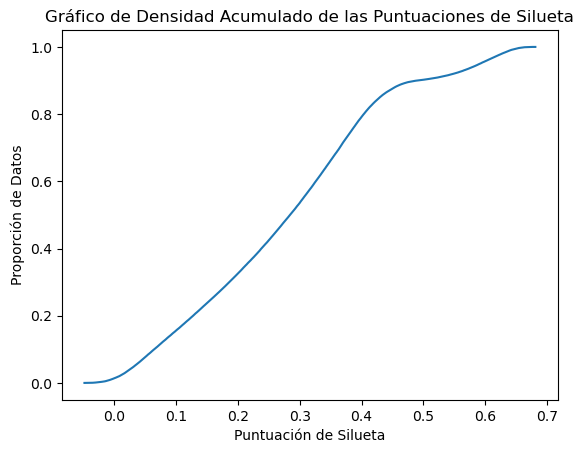

In [19]:
sample_silhouette_values = silhouette_samples(datas[columnas_a_estandarizar], model.labels_)
plt.plot(np.sort(sample_silhouette_values), np.arange(len(sample_silhouette_values)) / len(sample_silhouette_values))
plt.xlabel('Puntuación de Silueta')
plt.ylabel('Proporción de Datos')
plt.title('Gráfico de Densidad Acumulado de las Puntuaciones de Silueta')
plt.show()

# Creación de clusters

In [21]:
# Incorporamos los grupos encontrados por el modelo en nuestro DF
datas.loc[:, "cluster"] = model.labels_

## Agrupar clusters

In [23]:
# Al agruparlos podemos analizar y entender los resultados que nos arroja el modelo
# Generamos un perfil para cada clusters
datas.groupby("cluster")[columnas_a_estandarizar].mean()

,est_general_x,valor_de_mercado,edad,ritmo,chut,pase,regate,defensa_x,fisico,finalizacion,eficacia_faltas,habilidad_pase_largo,aceleracion,equilibrio,potencia_tiro,aguante,anticipacion,posicionamiento,vision_juego,marcaje,entrada,estirada,posicion_por
cluster,,,,,,,,,,,,,,,,,,,,,,,
0,0.716956,0.422923,0.406369,0.372202,0.646650,0.992247,0.753913,0.724628,0.585110,0.511544,0.806085,0.912378,0.350599,0.439032,0.711785,0.717470,0.773018,0.645019,0.857504,0.706153,0.687883,-0.339160,-0.336378
1,-0.202096,-0.111293,0.206633,-2.208900,-1.278038,-1.409300,-1.826835,-0.875172,-1.999833,-1.697110,-1.619332,-1.746960,-1.766974,-1.468435,-1.405115,-2.044017,-1.431480,-1.962774,-1.214221,-1.519839,-1.476058,2.754013,2.740382
2,-0.416857,-0.230679,-0.199565,-0.075392,-0.916284,-0.537875,-0.548494,0.712880,0.383677,-0.721387,-0.476747,-0.123523,-0.213145,-0.280047,-0.641843,0.100500,0.668365,-0.539217,-0.703954,0.711935,0.751850,-0.347203,-0.345789
3,-0.232615,-0.154600,-0.284649,0.517360,0.706301,0.055542,0.452687,-1.067655,-0.204874,0.807270,0.257104,-0.136291,0.507371,0.374683,0.428012,-0.049148,-0.868594,0.600577,0.274082,-0.812013,-0.848127,-0.347896,-0.346967


In [24]:
datas[columnas_a_estandarizar].shape

(180021, 23)